In [1]:
import pickle
import tkinter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from utils import config_plt, norm_lim, dnorm_lim, get_inp_res, generate_attributes, get_weight

NameError: name 'Ts' is not defined

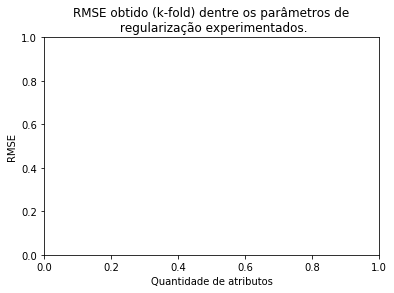

In [3]:
def ex2(data):
    k =  5
    lamb_max, lamb_step, lamb_ini = data['lamb_max'], data['lamb_step'], data['lamb_min']
    best_lambs = data['best_lambs']
    norm_min = data['norm_min']
    norm_max = data['norm_max']
    folds = data['folds'] 
    df_train = data['df_train']
    df_test = data['df_test']
    Ts = [e['T'] for e in best_lambs]
    avgs = [e['mean'] for e in best_lambs]
    lamb = [e['lamb_val'] for e in best_lambs]

    fig, ax = plt.subplots()
    ax.set(xlabel='Quantidade de atributos', ylabel='RMSE', title='RMSE obtido (k-fold) dentre os parâmetros de\n regularização experimentados.')
    ax.plot(Ts, avgs, label='RMSE, {}<=lambda<={}, passo {}'.format(lamb_ini, lamb_max, lamb_step))
    ax.legend()
    fig.savefig("ex02/TsMeans.png", dpi=300)

    
    fig, ax = plt.subplots()
    ax.set(xlabel='Quantidade de atributos', ylabel='Parâmetro de regularização',
        title='Melhor parâmetro de regularização\n dado o número de atributos')
    ax.plot(Ts, lamb, '-o', label='Melhor parâmetro de \nregularização para T atributos')
    fig.savefig("ex02/Tslambs.png", dpi=300)

    # De posse do mehlor K e melhor T, treinar um novo modelo com todos os dados
    model_info = min(best_lambs, key=lambda x:x['mean'])
    T = model_info['T']
    winp = model_info['winp']
    lamb = model_info['lamb_val']

    norm_df_test = norm_lim(df_test['Temp'].values, norm_min, norm_max) # Normalize input
    norm_df_train = norm_lim(df_train['Temp'].values, norm_min, norm_max) # Normalize input
    
    test_inp_original, test_out = get_inp_res(norm_df_test, k)      # Generate input matrix
    train_inp_original, train_out = get_inp_res(norm_df_train, k)   # Generate input matrix
    test_inp = generate_attributes(test_inp_original, T, k, winp)   # Generate attributes
    train_inp = generate_attributes(train_inp_original, T, k, winp) # Generate attributes
    
    ident = np.identity(len(test_inp[0]))
    ident[0][0] = 0
    w = get_weight(train_inp, train_out, lamb, ident)   # Train a new model using the entire dataset

    ŷ = dnorm_lim(test_inp.dot(w), norm_min, norm_max)
    y = dnorm_lim(test_out, norm_min, norm_max)
    rmse = np.sqrt((y - ŷ)**2)

NameError: name 'df_test' is not defined

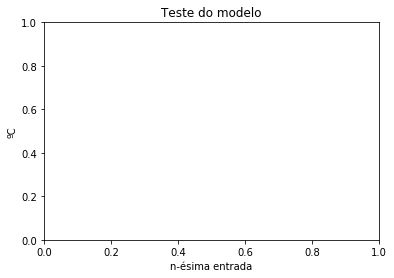

In [6]:
    fig, ax = plt.subplots()
    ax.set(xlabel='n-ésima entrada', ylabel='ºC', title='Teste do modelo')
    ax.plot(df_test['Date'].values[k:], y, label='Valor esperado')
    ax.plot(df_test['Date'].values[k:], ŷ, label='Valor estimado')
    ax.legend()
    fig.savefig("ex02/model_test.png", dpi=300)
    

In [ ]:
    fig, ax = plt.subplots()
    ax.set(xlabel='n-ésima entrada', ylabel='RMSE', title='Teste do modelo (RMSE)')
    ax.plot(df_test['Date'].values[k:], rmse, '.', label='Dados de teste')
    ax.legend()
    fig.savefig("ex02/model_rmse.png", dpi=300)

In [7]:
def ex1(data):
    kfolds_info = data['kfolds_info']
    df_train, df_test = data['df_train'], data['df_test']
    # Plot RMSE per k delays
    ks = [ e['k'] for e in kfolds_info]
    avgs = [ e['avg'] for e in kfolds_info]
    fig, ax = plt.subplots()
    ax.set(xlabel='K delays', ylabel='RMSE', title='RMSE por K atributos')
    ax.plot(ks, avgs, label='Validation data')
    ax.legend()
    fig.savefig("ex01/folds.png", dpi=300)

    # Using the best K, train and test a model using the entire training dataset
    best_fold = min(kfolds_info, key=lambda x:x['avg'])
    k = best_fold['k']
    print('EX01: Best K delay K={} avg={}'.format(k, best_fold['avg']))
    train_inp, train_out = get_inp_res(df_train['Temp'].values, k)
    test_inp, test_out = get_inp_res(df_test['Temp'].values, k)

    w = get_weight(train_inp, train_out)
    y_est = test_inp.dot(w)
    e = (test_out - y_est)
    ems = e * e
    erms = np.sqrt(ems)

NameError: name 'df_test' is not defined

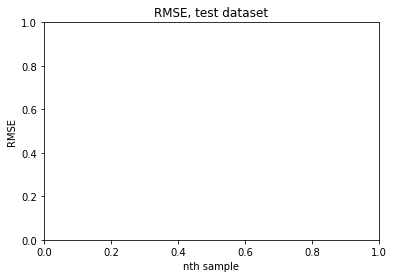

In [8]:
    # Plot model
    fig, ax = plt.subplots()
    ax.set(xlabel='nth sample', ylabel='RMSE', title='RMSE, test dataset')
    ax.plot(df_test['Date'].values[k:], erms,'.',label='Test dataset', markerfacecolor='blue')
    ax.legend()
    fig.savefig("ex01/model.png", dpi=300)

NameError: name 'df_test' is not defined

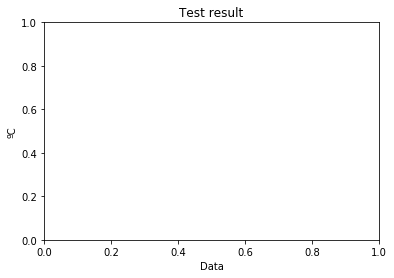

In [9]:
    fig, ax = plt.subplots()
    ax.set(xlabel='Data', ylabel='ºC', title='Test result')
    ax.plot(df_test['Date'].values[k:], test_out, label='Expected')
    ax.plot(df_test['Date'].values[k:], y_est, label='Estimated')
    ax.legend()
    fig.savefig("ex01/model_comp.png", dpi=300)
    print('EX01: gen={} w={} var={} std={} mean={} len={} min={} max={}'.format(
        best_fold, w, np.var(erms), np.mean(erms), np.std(erms), len(erms), np.min(erms), np.max(erms)))

EX01: Best K delay K=22 avg=2.4215989698821345


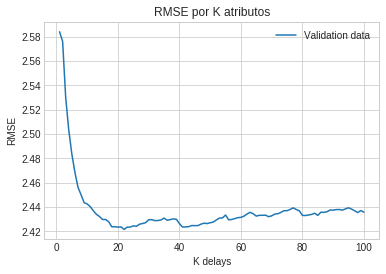

In [10]:
if __name__ == '__main__':
    config_plt()
    data1, data2 = None, None
    with open('ex02/data', 'rb') as f:
        data2 = pickle.load(f)
    
    with open('ex01/data', 'rb') as f:
        data1 = pickle.load(f)

    ex1(data1)
    ex2(data2)
    plt.show() 